In [ ]:
import requests
import zipfile
import io
import pandas as pd

def download_and_extract_csv(zip_url):
    """
    Downloads a ZIP file from `zip_url`, extracts the first .csv file found,
    and returns it as a Pandas DataFrame.
    """
    response = requests.get(zip_url)
    if response.status_code == 200:
        zip_content = io.BytesIO(response.content)
        
        with zipfile.ZipFile(zip_content, 'r') as zip_ref:
            for file_name in zip_ref.namelist():
                if file_name.endswith('.csv'):
                    with zip_ref.open(file_name) as csv_file:
                        df = pd.read_csv(csv_file)
                        return df
        # If no CSV is found in the ZIP, return None
        return None
    else:
        print(f"Failed to retrieve ZIP from {zip_url}")
        return None

# URLs of the ZIP files
csv_url_2024 = "https://cdn.sanity.io/files/jo7n4k8s/production/262f04c41d99fea692e0125c342e446782233fe4.zip/stack-overflow-developer-survey-2024.zip"
csv_url_2023 = "https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip"
csv_url_2022 = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip"
# Download and load each dataset
odf_2024 = download_and_extract_csv(csv_url_2024)
odf_2023 = download_and_extract_csv(csv_url_2023)
odf_2022 = download_and_extract_csv(csv_url_2022)

# Check if all DataFrames were loaded successfully
if odf_2024 is not None and odf_2023 is not None and odf_2022 is not None:
    print("All DataFrames loaded successfully.")
else:
    print("One or more DataFrames could not be loaded. Please check the URLs or network connection.")

All DataFrames loaded successfully.


In [20]:
with pd.option_context('display.max_columns', None,
                       'display.max_rows', None,
                       'display.width', 6000):
    print(odf_2024.head(20))


    ResponseId                                         MainBranch                 Age                                         Employment                            RemoteWork   Check                                   CodingActivities                                            EdLevel                                          LearnCode                                    LearnCodeOnline                                            TechDoc YearsCode YearsCodePro                  DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy TechEndorse                                            Country Currency  CompTotal                             LanguageHaveWorkedWith                             LanguageWantToWorkWith                                    LanguageAdmired                             DatabaseHaveWorkedWith                   DatabaseWantToWorkWith                          DatabaseAdmired                             PlatformHaveWorkedWith                             PlatformWantToWork

In [21]:
odf_2024.columns = odf_2024.columns.str.upper().str.replace(" ", "")
odf_2023.columns = odf_2023.columns.str.upper().str.replace(" ", "")
odf_2022.columns = odf_2022.columns.str.upper().str.replace(" ", "")

with pd.option_context('display.max_rows', None):
    print(odf_2024.shape)

(65437, 114)


In [3]:
with pd.option_context('display.max_columns', None,
                       'display.max_rows', None,
                       'display.width', 6000):
    print(odf_2024.head(20))



    RESPONSEID                                         MAINBRANCH                 AGE                                         EMPLOYMENT                            REMOTEWORK   CHECK                                   CODINGACTIVITIES                                            EDLEVEL                                          LEARNCODE                                    LEARNCODEONLINE                                            TECHDOC YEARSCODE YEARSCODEPRO                  DEVTYPE ORGSIZE PURCHASEINFLUENCE BUYNEWTOOL BUILDVSBUY TECHENDORSE                                            COUNTRY CURRENCY  COMPTOTAL                             LANGUAGEHAVEWORKEDWITH                             LANGUAGEWANTTOWORKWITH                                    LANGUAGEADMIRED                             DATABASEHAVEWORKEDWITH                   DATABASEWANTTOWORKWITH                          DATABASEADMIRED                             PLATFORMHAVEWORKEDWITH                             PLATFORMWANTTOWORK

In [ ]:
#DROPPING
#This question is a simple check tom make sure you are paying attention to the survey
odf_2024 = odf_2024[odf_2024['CHECK'] == "Apples"]

cols_to_drop = [
    'CHECK',
    'TECHDOC',
    'PURCHASEINFLUENCE',
    'BUYNEWTOOL',
    'BUILDVSBUY',
    'TECHENDORSE',
    'LANGUAGEADMIRED',
    'LANGUAGEWANTTOWORKWITH',
    'DATABASEADMIRED',
    'DATABASEWANTTOWORKWITH',
    'PLATFORMADMIRED',
    'PLATFORMWANTTOWORKWITH',
    'WEBFRAMEADMIRED',
    'WEBFRAMEWANTTOWORKWITH',
    'EMBEDDEDADMIRED',
    'EMBEDDEDWANTTOWORKWITH',
    'TOOLSTECHADMIRED',
    'TOOLSTECHWANTTOWORKWITH',
    'MISCTECHADMIRED',
    'MISCTECHWANTTOWORKWITH',
    'NEWCOLLABTOOLSADMIRED',
    'NEWCOLLABTOOLSWANTTOWORKWITH',
    'OFFICESTACKASYNCADMIRED',
    'OFFICESTACKASYNCWANTTOWORKWITH',
    'OFFICESTACKSYNCHAVEWORKEDWITH',
    'AISEARCHDEVADMIRED',
    'AISEARCHDEVWANTTOWORKWITH',
    'SOCOMM',
    'KNOWLEDGE_5',
    'KNOWLEDGE_6',
    'KNOWLEDGE_8',
    'KNOWLEDGE_9',
    'SURVEYLENGTH',
    'SURVEYEASE',
    'CURRENCY',
    'COMPTOTAL',
    'RESPONSEID'
]

odf_2024 = odf_2024.drop(columns=cols_to_drop)

print(odf_2024.shape)


(65437, 77)


In [ ]:
common_cols = set(odf_2024.columns).intersection(odf_2023.columns).intersection(odf_2022.columns)

df_2024 = odf_2024[list(common_cols)].copy()
df_2023 = odf_2023[list(common_cols)].copy()
df_2022 = odf_2022[list(common_cols)].copy()

# Add a "year" column to each DataFrame
df_2024["year"] = 2024
df_2023["year"] = 2023
df_2022["year"] = 2022

# Concatenate all DataFrames
combined_df = pd.concat([df_2024, df_2023, df_2022], ignore_index=True)

print("Combined DataFrame shape:", combined_df.shape)
print(combined_df.head())

with pd.option_context('display.max_rows', None):
    print(combined_df.dtypes)

Combined DataFrame shape: (227889, 44)
  OPSYSPROFESSIONALUSE TIMESEARCHING PROFESSIONALTECH FREQUENCY_3 REMOTEWORK  \
0                  NaN           NaN              NaN         NaN     Remote   
1                MacOS           NaN              NaN         NaN     Remote   
2              Windows           NaN              NaN         NaN     Remote   
3                  NaN           NaN              NaN         NaN        NaN   
4                  NaN           NaN              NaN         NaN        NaN   

  ORGSIZE  WORKEXP              SOPARTFREQ FREQUENCY_1  \
0     NaN      NaN                     NaN         NaN   
1     NaN     17.0  Multiple times per day         NaN   
2     NaN      NaN  Multiple times per day         NaN   
3     NaN      NaN                     NaN         NaN   
4     NaN      NaN  Multiple times per day         NaN   

                   ICORPM  ... KNOWLEDGE_4 OFFICESTACKSYNCWANTTOWORKWITH  \
0                     NaN  ...         NaN             

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

def encode_multi_select_columns(df):
    """
    This function:
      - Detects object-type columns with semicolon-separated values.
      - Splits these values into lists.
      - One-hot encodes the lists using MultiLabelBinarizer.
      - Drops the original columns and joins the new binary columns.
      - Converts column names to uppercase and drops any columns containing '_OTHER'.
      
    Parameters:
      df (pd.DataFrame): The input DataFrame.
      
    Returns:
      pd.DataFrame: The DataFrame after one-hot encoding multi-select columns.
    """
    print(f'Number of columns before encoding: {df.shape[1]}')
    
    multi_select_cols = []
    for col in df.select_dtypes(include='object').columns:
        if df[col].dropna().astype(str).str.contains(';').any():
            multi_select_cols.append(col)
    
    # One-hot encode the detected columns using MultiLabelBinarizer
    for col in multi_select_cols:
        # Get the raw column as strings, filling NaN with ''
        raw_col = df[col].fillna('').astype(str)
        
        split_col = raw_col.apply(lambda x: [item.strip() for item in x.split(';')] if x else [])
        
        mlb = MultiLabelBinarizer()
        encoded = mlb.fit_transform(split_col)
        
        encoded_df = pd.DataFrame(encoded, 
                                  columns=[f"{col}_{cls}" for cls in mlb.classes_],
                                  index=df.index)
        df.drop(columns=[col], inplace=True)

        df = df.join(encoded_df)
    
    print(f'Number of columns after encoding: {df.shape[1]}')
    
    df.columns = df.columns.str.upper()
    
    df = df.drop(columns=[col for col in df.columns if '_OTHER' in col])
    
    print(f'Number of columns after dropping _OTHER: {df.shape[1]}')
    
    return df

encoded_2024 = encode_multi_select_columns(odf_2024)


Number of columns before encoding: 77
Number of columns after encoding: 648
Number of columns after dropping _OTHER: 628


In [7]:
with pd.option_context('display.max_columns', None,
                       'display.max_rows', None,
                       'display.width', 6000):
    print(encoded_2024.head(20))


                                           MAINBRANCH                 AGE                            REMOTEWORK                                            EDLEVEL YEARSCODE YEARSCODEPRO                  DEVTYPE ORGSIZE                                            COUNTRY                          SOVISITFREQ SOACCOUNT                           SOPARTFREQ                 AISELECT          AISENT                       AIACC                                      AICOMPLEX      AITHREAT TBRANCH                  ICORPM  WORKEXP     KNOWLEDGE_1                 KNOWLEDGE_2                 KNOWLEDGE_3 KNOWLEDGE_4 KNOWLEDGE_7       FREQUENCY_1        FREQUENCY_2        FREQUENCY_3         TIMESEARCHING         TIMEANSWERING                   PROFESSIONALCLOUD              PROFESSIONALQUESTION                    INDUSTRY  JOBSATPOINTS_1  JOBSATPOINTS_4  JOBSATPOINTS_5  JOBSATPOINTS_6  JOBSATPOINTS_7  JOBSATPOINTS_8  JOBSATPOINTS_9  JOBSATPOINTS_10  JOBSATPOINTS_11  CONVERTEDCOMPYEARLY  JOBSAT  EMPLO

In [ ]:
df_comp = encoded_2024.dropna(subset=['CONVERTEDCOMPYEARLY'])
print("New DataFrame shape:", df_comp.shape)



New DataFrame shape: (23435, 628)


In [ ]:
Q1 = df_comp['CONVERTEDCOMPYEARLY'].quantile(0.25)
Q3 = df_comp['CONVERTEDCOMPYEARLY'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_comp = df_comp[(df_comp['CONVERTEDCOMPYEARLY'] >= lower_bound) & (df_comp['CONVERTEDCOMPYEARLY'] <= upper_bound)]


In [ ]:
import pandas as pd

range_dict = {}

for col in df_comp.columns:
    if df_comp[col].dtype == 'object':
        df_temp = df_comp.dropna(subset=[col, 'CONVERTEDCOMPYEARLY'])
        grouped_means = df_temp.groupby(col)['CONVERTEDCOMPYEARLY'].mean()
        if len(grouped_means) > 1:
            comp_range = grouped_means.max() - grouped_means.min()
            range_dict[col] = comp_range

range_series = pd.Series(range_dict).sort_values(ascending=False)
print("Columns sorted by compensation range (largest to smallest):")


Columns sorted by compensation range (largest to smallest):


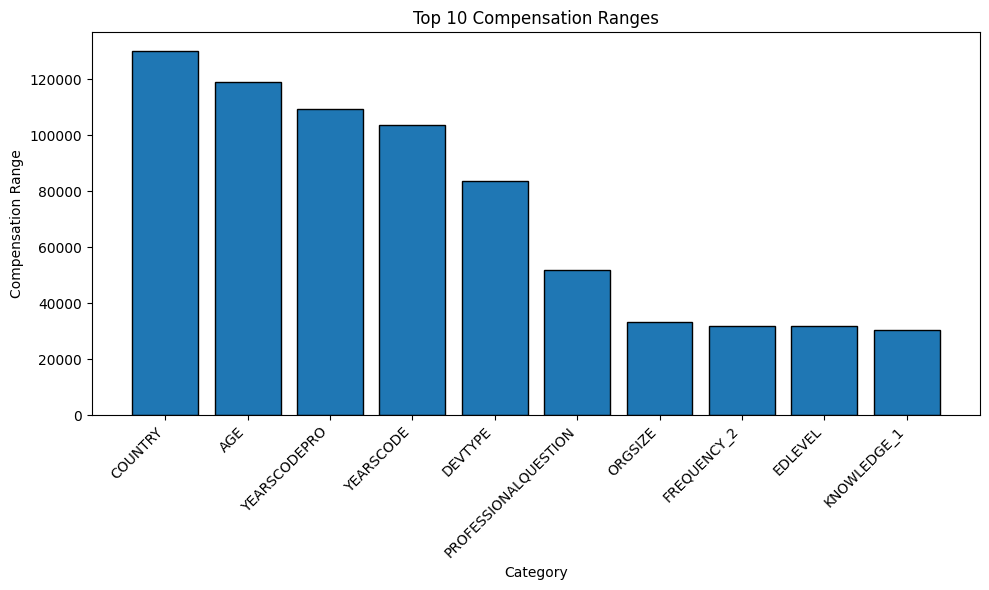

In [22]:
import matplotlib.pyplot as plt

top_10 = range_series.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10.values, edgecolor='black')
plt.title("Top 10 Compensation Ranges")
plt.xlabel("Category")
plt.ylabel("Compensation Range")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


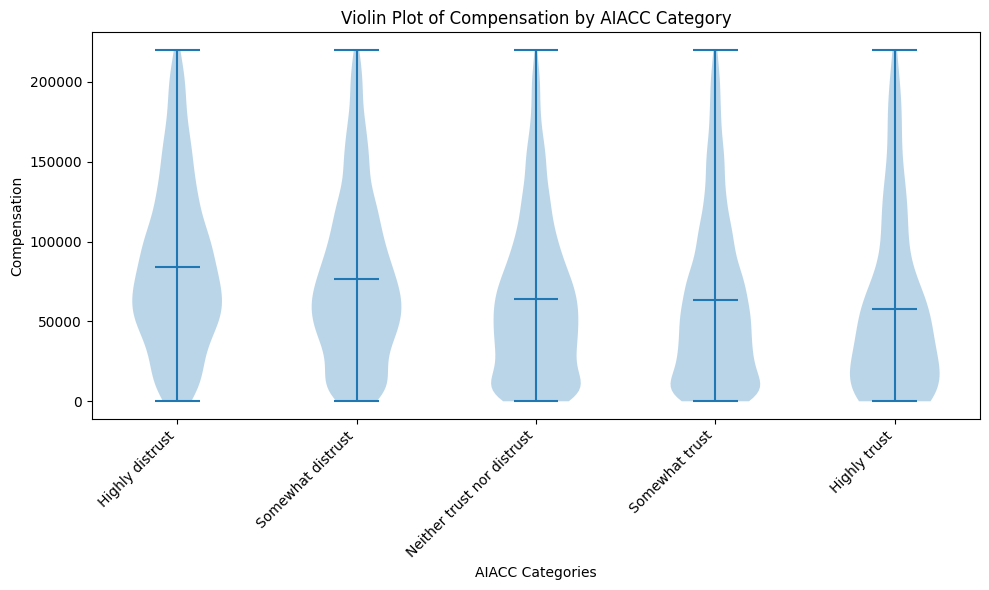

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

order = ["Highly distrust", "Somewhat distrust", "Neither trust nor distrust", "Somewhat trust", "Highly trust"]

data = [df_comp.loc[df_comp['AIACC'] == cat, 'CONVERTEDCOMPYEARLY'] for cat in order]

plt.figure(figsize=(10, 6))
plt.violinplot(data, showmeans=True)

plt.xticks(ticks=np.arange(1, len(order) + 1), labels=order, rotation=45, ha='right')
plt.xlabel("AIACC Categories")
plt.ylabel("Compensation")
plt.title("Violin Plot of Compensation by AIACC Category")
plt.tight_layout()
plt.show()


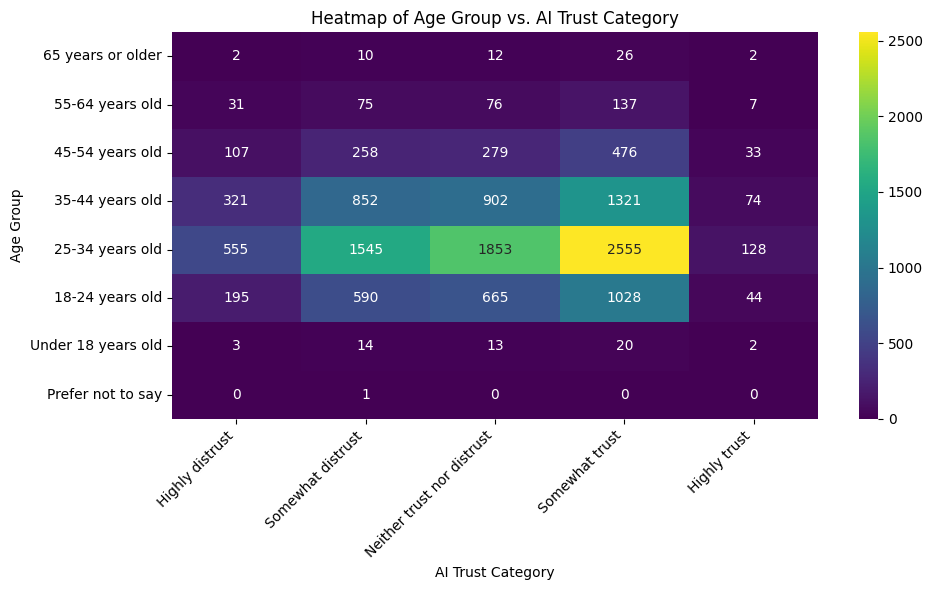

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom orders
age_order = [
    "65 years or older",
    "55-64 years old",
    "45-54 years old",
    "35-44 years old",
    "25-34 years old",
    "18-24 years old",
    "Under 18 years old",
    "Prefer not to say"
]

trust_order = [
    "Highly distrust",
    "Somewhat distrust",
    "Neither trust nor distrust",
    "Somewhat trust",
    "Highly trust"
]


heatmap_data = df_comp.pivot_table(
    index="AGE",       
    columns="AIACC",   
    aggfunc="size",    
    fill_value=0
)

heatmap_data = heatmap_data.reindex(index=age_order)
heatmap_data = heatmap_data.reindex(columns=trust_order)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="viridis")
plt.title("Heatmap of Age Group vs. AI Trust Category")
plt.xlabel("AI Trust Category")
plt.ylabel("Age Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
def clean_and_split(val):
    if isinstance(val, str):
        if ';' in val:
            val = val.lower()
            return [item.strip() for item in val.split(';')].sort()
        else:
            val = val.lower()
            return val.strip()
    return val
odf_2024 = odf_2024.applymap(clean_and_split)
combined_df = combined_df.applymap(clean_and_split)

C:\Users\assaf\AppData\Local\Temp\ipykernel_16716\810499925.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  odf_2024 = odf_2024.applymap(clean_and_split)
C:\Users\assaf\AppData\Local\Temp\ipykernel_16716\810499925.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(clean_and_split)


Total respondents per year:
 year
2022    4507
2023    5361
2024    3713
dtype: int64
   year LANGUAGEHAVEWORKEDWITH  count  normalized
0  2022                    apl     59    0.013091
1  2022               assembly      4    0.000888
2  2022             bash/shell     38    0.008431
3  2022                      c     79    0.017528
4  2022                     c#    541    0.120036
5  2022                    c++    187    0.041491
6  2022                clojure     70    0.015531
7  2022                   dart    105    0.023297
8  2022                 delphi    277    0.061460
9  2022                 elixir     44    0.009763
Top 10 Languages Overall:
 Index(['python', 'c#', 'java', 'javascript', 'delphi', 'c++', 'swift',
       'kotlin', 'php', 'go'],
      dtype='object', name='LANGUAGEHAVEWORKEDWITH')
Pivot Table:
 year                        2022      2023      2024
LANGUAGEHAVEWORKEDWITH                              
c#                      0.120036  0.121060  0.121734
c++      

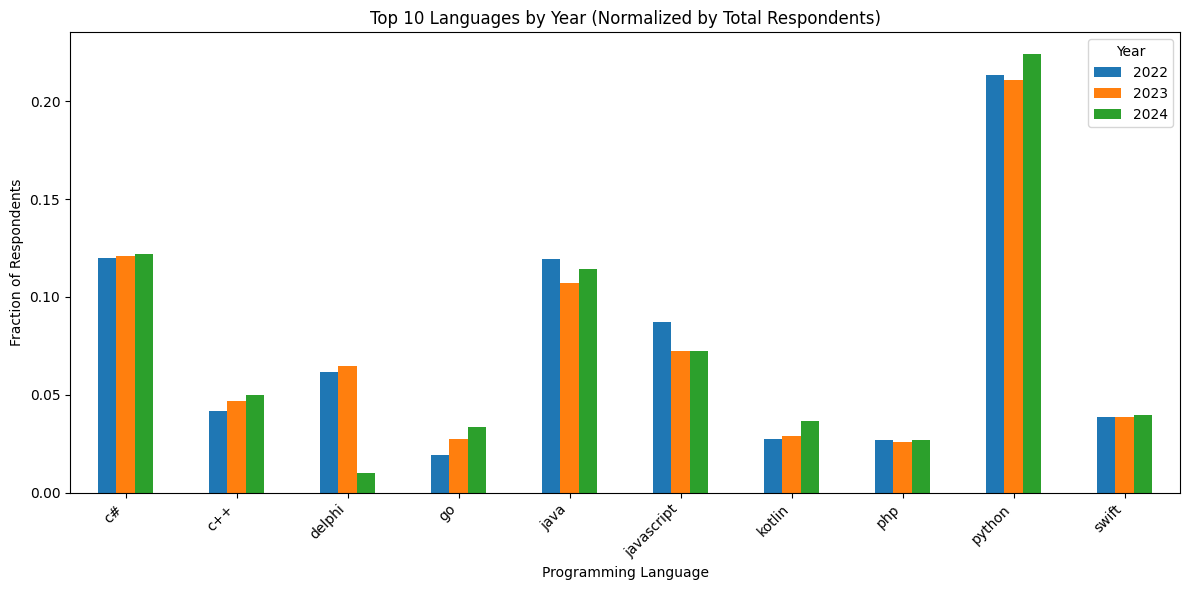

In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def parse_language_list(lang_value):
    """
    Custom parser for the LANGUAGEHAVEWORKEDWITH column.
    Expects values in the form "[html/css, javascript, typescript]" (without quotes)
    and returns a list of lowercased languages.
    """
    if pd.isna(lang_value):
        return []
    if isinstance(lang_value, str):
        lang_value = lang_value.strip()
        if lang_value.startswith("[") and lang_value.endswith("]"):
            inner = lang_value[1:-1].strip()
            if not inner:
                return []
            # Split by comma and strip spaces and any extraneous quotes
            parts = inner.split(",")
            parts = [part.strip().strip("'").strip('"').lower() for part in parts if part.strip()]
            return parts
        else:
            parts = lang_value.split(",")
            parts = [part.strip().strip("'").strip('"').lower() for part in parts if part.strip()]
            return parts
    return []

df = combined_df.copy()

df['LANGUAGEHAVEWORKEDWITH'] = df['LANGUAGEHAVEWORKEDWITH'].apply(parse_language_list)


total_respondents = (
    df[df['LANGUAGEHAVEWORKEDWITH'].apply(lambda x: len(x) > 0)]
    .groupby('year')
    .size()
)
print("Total respondents per year:\n", total_respondents)


df_exploded = df.explode('LANGUAGEHAVEWORKEDWITH')

lang_counts = (
    df_exploded
    .groupby(['year', 'LANGUAGEHAVEWORKEDWITH'])
    .size()
    .reset_index(name='count')
)

lang_counts['normalized'] = lang_counts.apply(
    lambda row: row['count'] / total_respondents[row['year']], axis=1
)

print(lang_counts.head(10))

top_10_langs_overall = (
    lang_counts
    .groupby('LANGUAGEHAVEWORKEDWITH')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
print("Top 10 Languages Overall:\n", top_10_langs_overall)

top_lang_counts = lang_counts[lang_counts['LANGUAGEHAVEWORKEDWITH'].isin(top_10_langs_overall)]

pivot_df = (
    top_lang_counts
    .pivot(index='LANGUAGEHAVEWORKEDWITH', columns='year', values='normalized')
    .fillna(0)
)
print("Pivot Table:\n", pivot_df)

plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', ax=plt.gca())
plt.title("Top 10 Languages by Year (Normalized by Total Respondents)")
plt.xlabel("Programming Language")
plt.ylabel("Fraction of Respondents")
plt.legend(title="Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

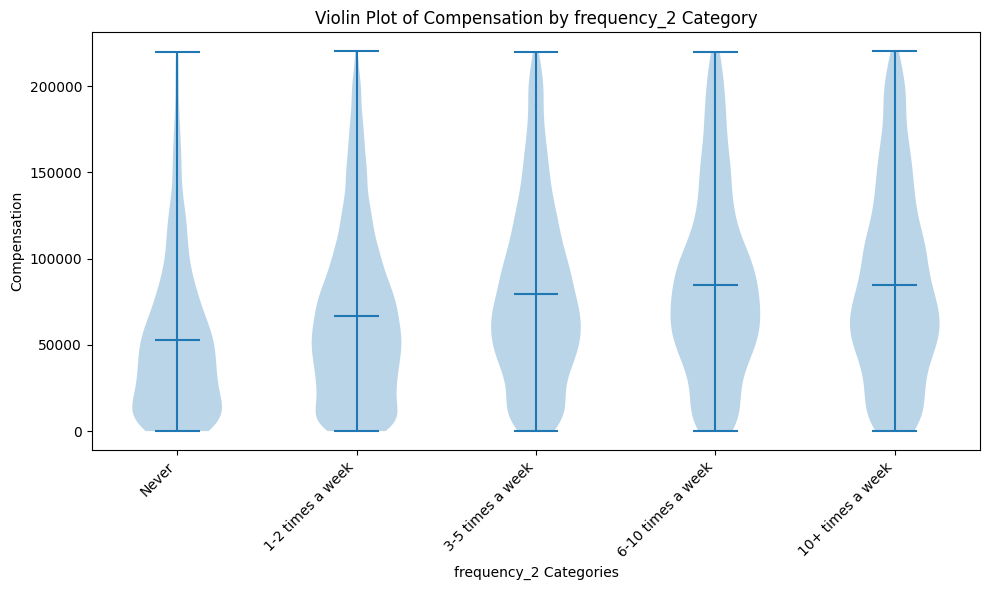

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

desired_order = ["Never", "1-2 times a week", "3-5 times a week", 
                 "6-10 times a week", "10+ times a week"]

data = [df_comp.loc[df_comp['FREQUENCY_2'] == cat, 'CONVERTEDCOMPYEARLY'] 
        for cat in desired_order]

plt.figure(figsize=(10, 6))
plt.violinplot(data, showmeans=True)

plt.xticks(ticks=np.arange(1, len(desired_order) + 1),
           labels=desired_order, rotation=45, ha='right')
plt.xlabel("frequency_2 Categories")
plt.ylabel("Compensation")
plt.title("Violin Plot of Compensation by frequency_2 Category")
plt.tight_layout()
plt.show()


C:\Users\assaf\AppData\Local\Temp\ipykernel_6112\3813776779.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5 = avg_priority.groupby('ORGSIZE').apply(lambda df: df.nlargest(5, 'Importance')).reset_index(drop=True)
C:\Users\assaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\assaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz

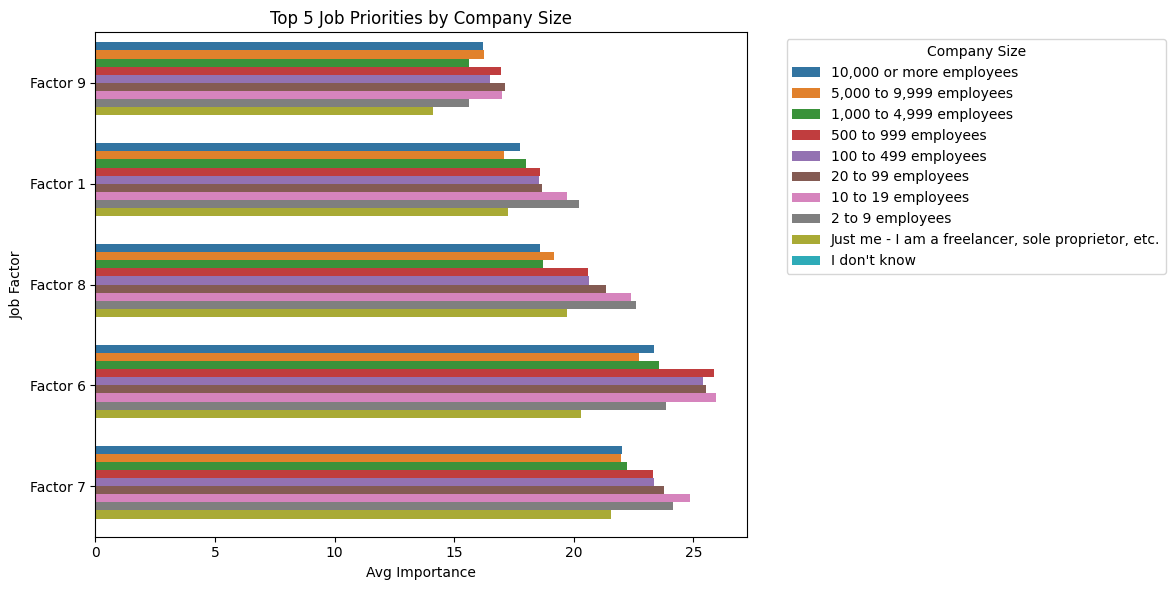

In [28]:
priority_cols = [col for col in odf_2024.columns if col.startswith('JOBSATPOINTS_')]
priority_df = odf_2024[['ORGSIZE'] + priority_cols].dropna()

priority_df = priority_df.melt(id_vars='ORGSIZE', value_vars=priority_cols,
                               var_name='Priority', value_name='Importance')

avg_priority = priority_df.groupby(['ORGSIZE', 'Priority'])['Importance'].mean().reset_index()
avg_priority['Priority'] = avg_priority['Priority'].str.replace('JOBSATPOINTS_', 'Factor ')

top5 = avg_priority.groupby('ORGSIZE').apply(lambda df: df.nlargest(5, 'Importance')).reset_index(drop=True)

size_order = [
    '10,000 or more employees',
    '5,000 to 9,999 employees',
    '1,000 to 4,999 employees',
    '500 to 999 employees',
    '100 to 499 employees',
    '20 to 99 employees',
    '10 to 19 employees',
    '2 to 9 employees',
    'Just me - I am a freelancer, sole proprietor, etc.',
    "I don't know"
]

top5['ORGSIZE'] = pd.Categorical(top5['ORGSIZE'], categories=size_order, ordered=True)
top5 = top5.sort_values('ORGSIZE', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=top5, x='Importance', y='Priority', hue='ORGSIZE', hue_order=size_order)

plt.title('Top 5 Job Priorities by Company Size')
plt.xlabel('Avg Importance')
plt.ylabel('Job Factor')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

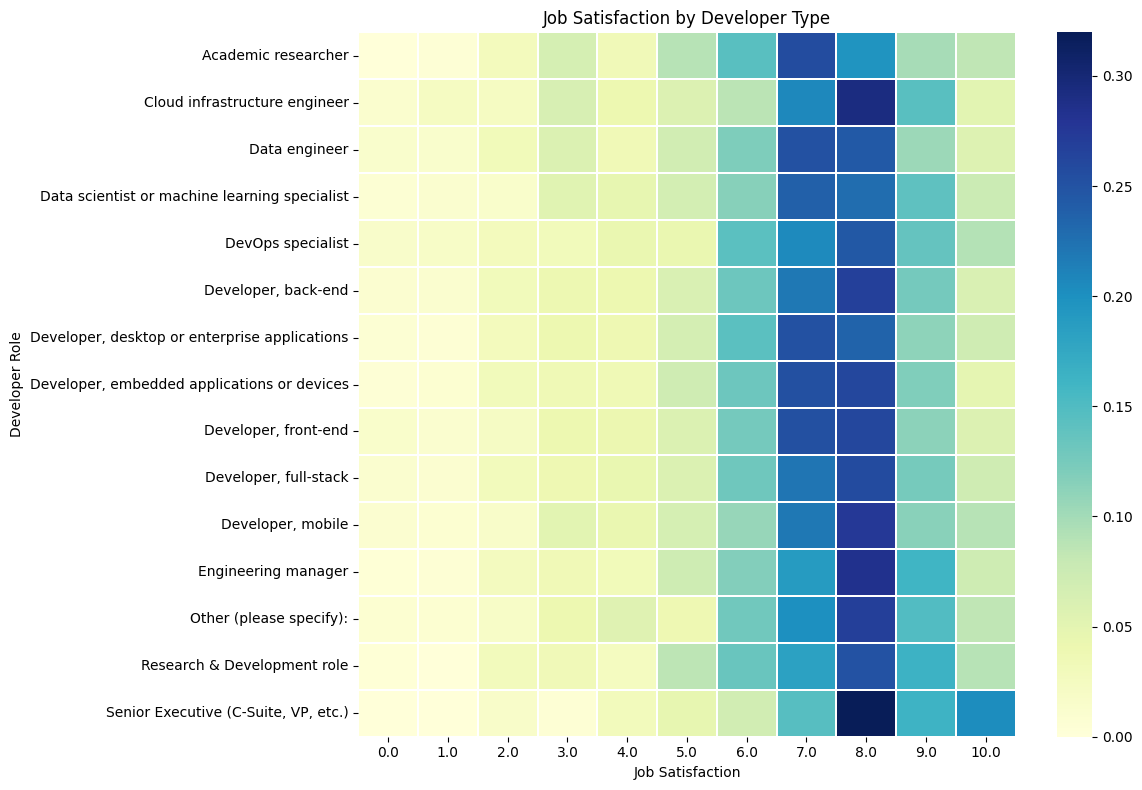

In [29]:
salary_q_low = odf_2024['CONVERTEDCOMPYEARLY'].quantile(0.025)
salary_q_high = odf_2024['CONVERTEDCOMPYEARLY'].quantile(0.975)

valid_countries = odf_2024['COUNTRY'].value_counts()[lambda x: x >= 50].index

filtered_df = odf_2024[
    (odf_2024['CONVERTEDCOMPYEARLY'] >= salary_q_low) &
    (odf_2024['CONVERTEDCOMPYEARLY'] <= salary_q_high) &
    (odf_2024['COUNTRY'].isin(valid_countries))
]

dev_sat = filtered_df.groupby('DEVTYPE')['JOBSAT'].value_counts(normalize=True).unstack().fillna(0)

top_devtypes = filtered_df['DEVTYPE'].value_counts().head(15).index
dev_sat = dev_sat.loc[dev_sat.index.intersection(top_devtypes)]

plt.figure(figsize=(12, 8))
sns.heatmap(dev_sat, cmap='YlGnBu', annot=False, linewidths=0.3)
plt.title('Job Satisfaction by Developer Type')
plt.xlabel('Job Satisfaction')
plt.ylabel('Developer Role')
plt.tight_layout()